<a href="https://colab.research.google.com/github/AnuragSahu/Research_In_Progress/blob/master/myCIFAR10_handsOnSession.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np

In [0]:
#Getting the dataset
transform = transforms.Compose([transforms.ToTensor()])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True,transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True,transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')
#LABELS 0,1,2,3,4,5,6,7,8,9


  0%|          | 0/170498071 [00:00<?, ?it/s]

170500096it [00:08, 19878928.20it/s]                               


Files already downloaded and verified


In [0]:
print(type(trainset))
print(type(trainloader))
print(type(testset))
print(type(testloader))
#converting into an iterable object
trainiter = iter(trainloader)
#print("Number of train samples",len(list(trainiter)))
testiter = iter(testloader)
#print("Number of test samples",len(list(testiter)))
#images, labels = trainiter.next()


<class 'torchvision.datasets.cifar.CIFAR10'>
<class 'torch.utils.data.dataloader.DataLoader'>
<class 'torchvision.datasets.cifar.CIFAR10'>
<class 'torch.utils.data.dataloader.DataLoader'>


<class 'torch.Tensor'>
torch.Size([64, 3, 32, 32])


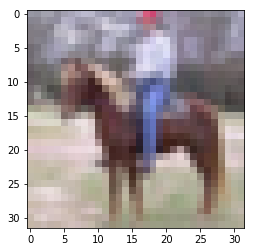

In [0]:
#Analyzing one sample and display one particular image
image, label = trainiter.next()
print(type(image))
print(image.size())

img = image[0,:].numpy();
img=np.transpose(img,(1,2,0))

import matplotlib.pyplot as plt
plt.imshow(img)

In [0]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6,16,5)
        self.fc1 = nn.Linear(16*5*5,120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1,16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = (self.fc3(x))
        return x


In [0]:
#MAIN CELL

net=Net() 

criterion = nn.CrossEntropyLoss()
lr=1e-4
momentum=0.09
nepochs=1000
#optimizer = optim.SGD(net.parameters(), lr, momentum)
optimizer=optim.Adam(net.parameters(), lr)

def correct(groundTruth,output):
  assert groundTruth.size(0) == output.size(0)
  _, indices = torch.max(outputs, 1)
  ch=torch.eq(groundTruth,indices)
  return torch.sum(ch).item()

trainAcc=[];testAcc=[];
trainLoss=[];testLoss=[];

totalTrainSamples=len(trainloader.dataset)
print("Total training samples :", totalTrainSamples)
totalTestSamples=len(testloader.dataset);
print("Total testing samples :", totalTestSamples)


for epoch in range(nepochs):
  
    #TRAINING
    running_loss_train = 0.0
    numCorr_train=0;
    net.train()
    inputs_=None;labels_=None;
    
    for i, data in enumerate(trainloader, 0):
       
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        #print(outputs.size())
        numCorr_train+=correct(labels,outputs)
        
    
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss_train += loss.item()
        #break
    if epoch % 2 == 0:
      print("Epoch", epoch, "Train loss",running_loss_train/totalTrainSamples)
      print("Train Accuracy: ", round((numCorr_train/totalTrainSamples)*100,2),"%" )
            
    
    trainAcc.append((numCorr_train/totalTrainSamples)*100)
    trainLoss.append(running_loss_train/totalTrainSamples)
    
    #TESTING
    running_loss_train = 0.0
    numCorr_train=0;
    #net.train()
    inputs_=None;labels_=None;
    
    for i, data in enumerate(testloader, 0):
       
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        #optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        #print(outputs.size())
        numCorr_train+=correct(labels,outputs)
        
    
        loss = criterion(outputs, labels)
        #loss.backward()
        #optimizer.step()

        # print statistics
        running_loss_train += loss.item()
        #break
    if epoch % 2 == 0:
      print("Epoch", epoch, "Train loss",running_loss_train/totalTrainSamples)
      print("Train Accuracy: ", round((numCorr_train/totalTrainSamples)*100,2),"%" )
            
    
    testAcc.append((numCorr_train/totalTestSamples)*100)
    testLoss.append(running_loss_train/totalTestSamples)

Total training samples : 50000
Total testing samples : 10000
Epoch 0 Train loss 0.032675241441726684
Train Accuracy:  23.81 %
Epoch 0 Train loss 0.006048982729911804
Train Accuracy:  6.18 %
Epoch 2 Train loss 0.02727807370185852
Train Accuracy:  36.9 %
Epoch 2 Train loss 0.005238044853210449
Train Accuracy:  8.04 %
Epoch 4 Train loss 0.024874642510414123
Train Accuracy:  42.47 %
Epoch 4 Train loss 0.004913211801052093
Train Accuracy:  8.61 %
Epoch 6 Train loss 0.023910368580818176
Train Accuracy:  44.81 %
Epoch 6 Train loss 0.004715827314853668
Train Accuracy:  9.0 %
Epoch 8 Train loss 0.023178662045001984
Train Accuracy:  46.44 %
Epoch 8 Train loss 0.004624347882270813
Train Accuracy:  9.33 %
Epoch 10 Train loss 0.022685277054309845
Train Accuracy:  47.83 %


Text(0.5, 0, '#Epochs')

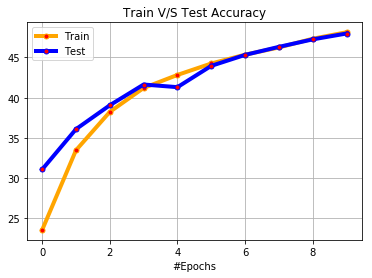

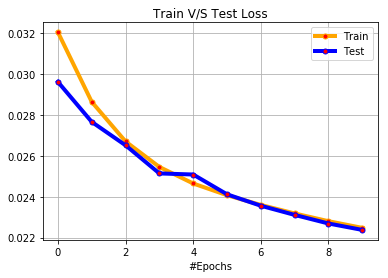

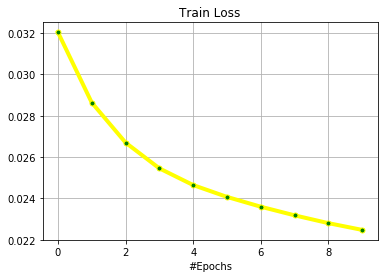

In [0]:
  
    #Plots

import matplotlib.pyplot as plt

fig1, ax1=  plt.subplots()
plt.grid()
ax1.plot(trainAcc,marker='o', markerfacecolor='red', markersize=5, color='orange', linewidth=4)
ax1.plot(testAcc,marker='o', markerfacecolor='red', markersize=5, color='blue', linewidth=4)
plt.gca().legend(('Train','Test'))
ax1.set_title("Train V/S Test Accuracy")
ax1.set_xlabel("#Epochs")




fig2, ax2=  plt.subplots()
plt.grid()
ax2.plot(trainLoss,marker='o', markerfacecolor='red', markersize=5, color='orange', linewidth=4,label="Train Loss")
ax2.plot(testLoss,marker='o', markerfacecolor='red', markersize=5, color='blue', linewidth=4,label="Test Loss")
plt.gca().legend(('Train','Test'))
ax2.set_title("Train V/S Test Loss")
ax2.set_xlabel("#Epochs")

fig3, ax3=  plt.subplots()
plt.grid()
ax3.plot(trainLoss,marker='o', markerfacecolor='green', markersize=5, color='yellow', linewidth=4,label="Train Loss")
ax3.set_title("Train Loss")
ax3.set_xlabel("#Epochs")


In [0]:
# upload external file before import
from google.colab import files

torch.save(net.state_dict(), 'checkpoint.pth')

# download checkpoint file
files.download('checkpoint.pth')